In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')


In [2]:
def add_series(path):
    path1 = path
    #remove quotes
    path1 = path1.replace('"', '')
    #read into pandas
    global series1
    series1 = pd.read_csv(path1)
    if type(series1.iloc[0,-1]) == str:
        #change last column to float
        series1.iloc[:,-1] = series1.iloc[:,-1].str.replace(',', '').astype(float)
    #show heading
    add_change(series1)
    add_pct(series1)
    return series1.head()
    

In [3]:
def add_change(series):
    #calculate change col for series1, convert strings to floats
    changes = [series.iloc[i,-1] - series.iloc[i-1,-1] for i in range (1,len(series))]
    #round the results
    change_clean = [float("{0:.3f}".format(x)) for x in changes]
    #create change column
    series.insert(1, 'change', np.nan_to_num(0))
    #insert the data from second row to the end
    series['change'][1:len(series)] = change_clean

In [4]:
def add_pct(series):
    #calculate percent change col for series1
    pct_change = [(series.iloc[i,-1]/series.iloc[i-1,-1] -1) * 100 for i in range(1,len(series))]
    #round the results
    pct_clean = [float("{0:.3f}".format(x)) for x in pct_change]
    #create pct_change column
    series.insert(1, 'pct_change', np.nan_to_num(0))
    #insert the data from second row to the end
    series['pct_change'][1:len(series)] = pct_clean
    

In [5]:
#add path for csv containting x-axis data
file1 = input("Paste path for the x-axis data: ")
#run add_series function to transform csv into a df with change and pct_change columns added
add_series(file1)
#define resulting df as indic1
indic1 = series1
#show column names
print(f'Column headers for 1st indictaor are: {indic1.columns}')
#show first five rows
indic1.head()

Paste path for the x-axis data: "C:\Users\woodf\astoria\data\koyfin_nfp.csv"
Column headers for 1st indictaor are: Index([' Date', 'pct_change', 'change', 'NFP_TCH Close', 'NFP_TCH Adj. Close'], dtype='object')


,Date,pct_change,change,NFP_TCH Close,NFP_TCH Adj. Close
0,03-31-2020,0.000,0.0,-701.0,-701.0
1,02-29-2020,-138.944,974.0,273.0,273.0
2,02-28-2020,0.000,0.0,273.0,273.0
3,01-31-2020,-17.582,-48.0,225.0,225.0
4,12-31-2019,-35.556,-80.0,145.0,145.0


In [6]:
#pick column you want to chart
x_col = input('Enter column header for x-axis that you want to chart: ')
#set x_data to that column
x_data = indic1[x_col]
x_date = indic1[" Date"]

Enter column header for x-axis: NFP_TCH Adj. Close


In [7]:
#add path for csv containting y-axis data
file2 = input("Paste path for y-axis data: ")
#run add_series function to transform csv into a df with change and pct_change columns added
add_series(file2)
#show columns
indic2 = series1
#show column names
print(f'Column headers for 2nd indictaor are: {indic2.columns}')
#show first five rows 
indic2.head()

Paste path for y-axis data: "C:\Users\woodf\astoria\data\koyfin_spx_month.csv"
Column headers for 2nd indictaor are: Index([' Date', 'pct_change', 'change', 'SPX Open', 'SPX Low', 'SPX High',
       'SPX Close', 'SPX Adj. Close'],
      dtype='object')


,Date,pct_change,change,SPX Open,SPX Low,SPX High,SPX Close,SPX Adj. Close
0,5/6/2020,0.000,0.00,"2,869.09","2,797.85","2,899.00","2,867.00",2867.00
1,4/30/2020,1.585,45.43,"2,498.08","2,447.49","2,954.86","2,912.43",2912.43
2,3/31/2020,-11.257,-327.84,"2,974.28","2,191.86","3,136.72","2,584.59",2584.59
3,2/28/2020,14.301,369.63,"3,262.29","2,855.84","3,393.52","2,954.22",2954.22
4,1/31/2020,9.233,272.76,"3,248.45","3,206.41","3,337.48","3,226.98",3226.98


In [8]:
#pick column you want to chart
y_col = input('Enter column header for y-axis: ')
#set y_data to that column
y_data = indic2[y_col]
y_date = indic2[" Date"]

Enter column header for y-axis: change


In [9]:
#print number of rows for each data set
print(f'X data is {len(x_data)} rows long.')
print(f'Y data is {len(y_data)} rows long.')

X data is 241 rows long.
Y data is 242 rows long.


In [54]:
#euqalize data rows if they're not the same
if len(x_data) > len(y_data):
    x_data = x_data.iloc[:len(y_data)]
    x_date = x_date.iloc[:len(y_data)]
    
elif len(y_data) > len(x_data):
    y_data = y_data.iloc[:len(x_data)]
    y_date = y_date.iloc[:len(x_data)]


In [10]:
#define label names
label_x = indic1.columns[-1]
label_y = indic2.columns[-1]

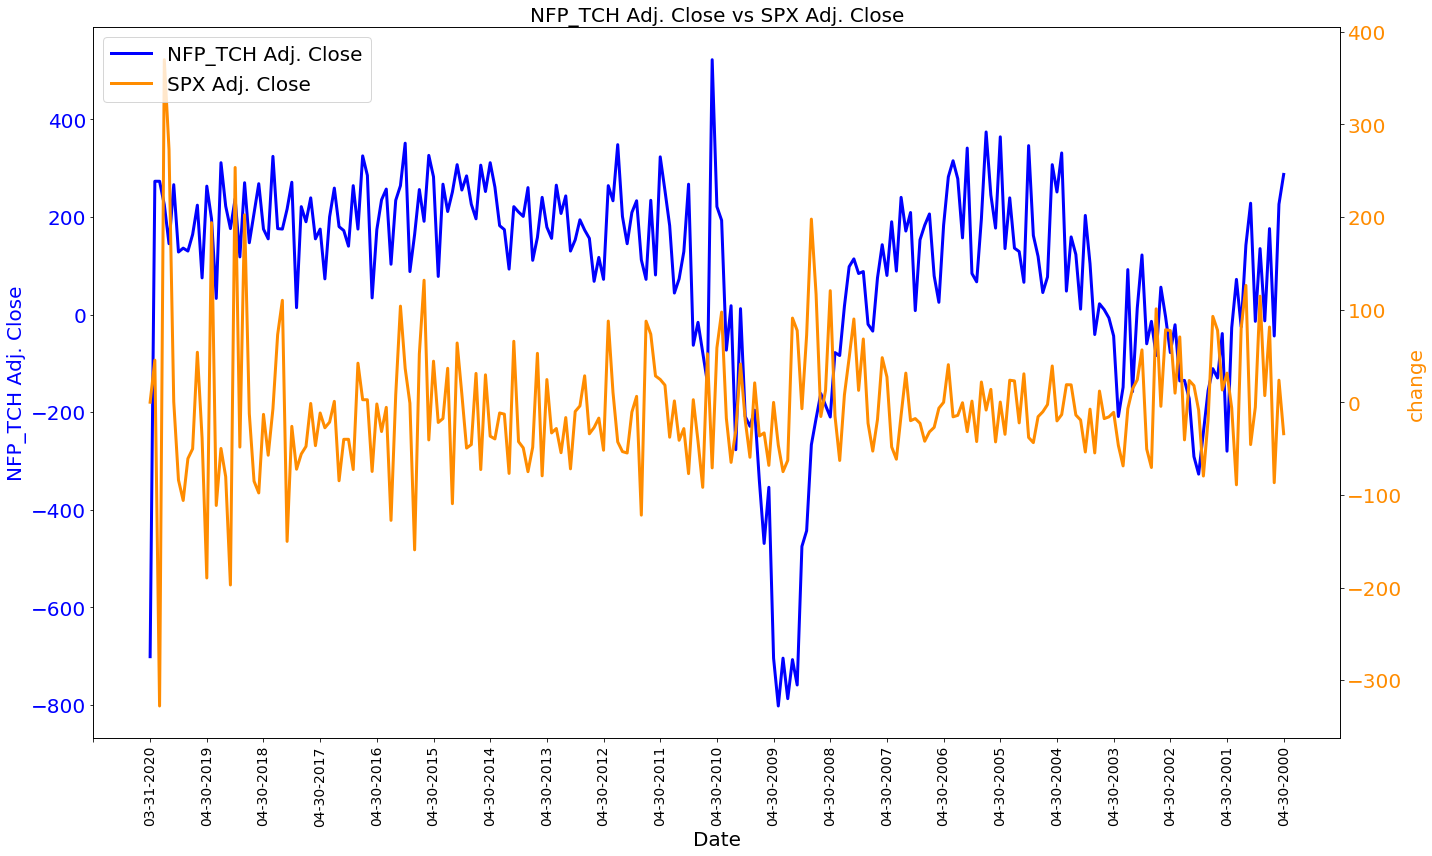

In [81]:
#draw line chart
fig,ax1 = plt.subplots(figsize=(20,12))
ax1.set_title(f"{label_x} vs {label_y}", fontsize=20)
ax1.set_xlabel("Date", fontsize=20)
ax1.set_ylabel(x_col, fontsize=20, color="blue")
ax1.plot(x_date,x_data, color = "blue", label=f"{label_x}", linewidth=3)
ax1.tick_params(axis='y', labelcolor="blue", labelsize=20)
start, end = ax1.get_xlim()
freq = len(x_date)/12
ax1.set_xticks(np.arange(start, end,freq))
ax1.tick_params(axis='x', labelrotation=90, labelsize = 14)
ax2 = ax1.twinx()
ax2.set_ylabel(y_col, fontsize=20, color="darkorange")
ax2.plot(x_date,y_data, color = "darkorange", label=f"{label_y}", linewidth=3)
ax2.tick_params(axis='y', labelcolor="darkorange", labelsize=20)
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes, fontsize=20)
ax2.set_xticks(np.arange(start, end,12))
fig.tight_layout()
plt.savefig(f"images/{label_x}_{label_y}_line.png")


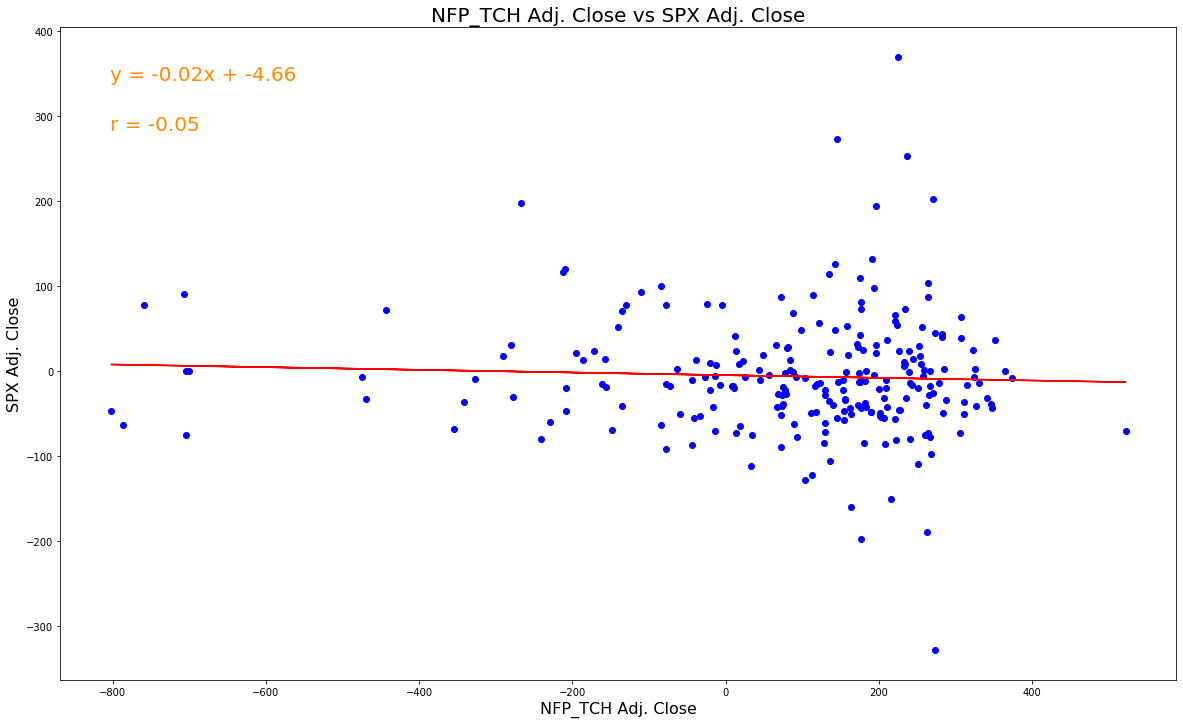

In [83]:
#draw regression chart
plt.figure(figsize=(20,12))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_data,y_data, color="blue")
plt.plot(x_data,regress_values,"r-")
plt.annotate(line_eq,(50,600),fontsize=20,color="darkorange", xycoords="axes points")
plt.annotate(f'r = {str(round(rvalue,2))}',(50,550),fontsize=20,color="darkorange", xycoords="axes points")
plt.title(f'{label_x} vs {label_y}', fontsize=20)
plt.xlabel(label_x, fontsize=16)
plt.ylabel(label_y, fontsize=16)
plt.savefig(f"images/{label_x}_{label_y}_regress.png")